In [86]:
import numpy as np
from scipy import misc
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float, filters
from skimage.util import random_noise
from skimage import transform

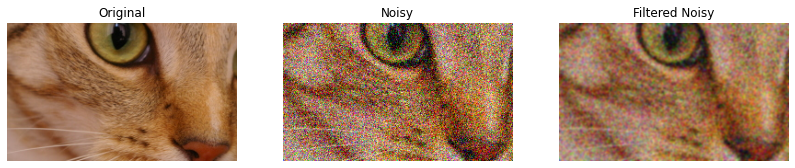

In [115]:
original = img_as_float(data.chelsea()[100:250, 50:300])
fig, ax = plt.subplots(ncols = 3, figsize = (14,8))

# Original image
ax[0].imshow(original)
ax[0].axis('off')
ax[0].set_title('Original')

# Noisy image
noisy = random_noise(original, var=0.2**2)

ax[1].imshow(noisy)
ax[1].axis('off')
ax[1].set_title('Noisy')

# Filtered noisy image
filtered_noisy = filters.gaussian(noisy, sigma=1, channel_axis=-1)
ax[2].imshow(filtered_noisy)
ax[2].axis('off')
ax[2].set_title('Filtered Noisy')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


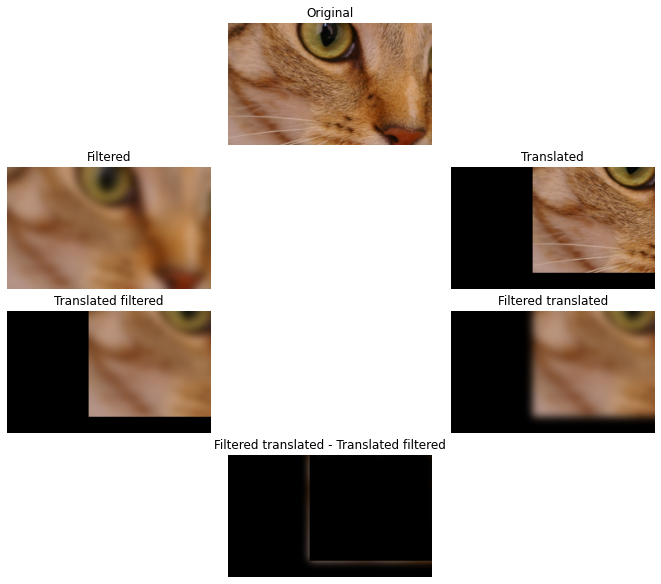

In [100]:
original = img_as_float(data.chelsea()[100:250, 50:300])

fig = plt.figure(constrained_layout = True, figsize = (12,8))
gs = fig.add_gridspec(nrows = 4, ncols = 4)
ax[0, 0] = fig.add_subplot(gs[0, 1:3])
ax[1, 0] = fig.add_subplot(gs[1, 0:2])
ax[1, 1] = fig.add_subplot(gs[1, 2:4])
ax[2, 0] = fig.add_subplot(gs[2, 0:2])
ax[2, 1] = fig.add_subplot(gs[2, 2:4])
ax[3, 0] = fig.add_subplot(gs[3, 1:3])

# Original image
ax[0, 0].imshow(original)
ax[0, 0].axis('off')
ax[0, 0].set_title('Original')

# Gaussian filtered
filtered = filters.gaussian(original, sigma=5, channel_axis=-1)
ax[1,0].imshow(filtered)
ax[1,0].axis('off')
ax[1,0].set_title('Filtered')

# Tranlated filtered
tform = transform.EuclideanTransform(
    translation = (100, -20)
    )
translated_filtered = transform.warp(filtered, tform.inverse)
ax[2,0].imshow(translated_filtered)
ax[2,0].axis('off')
ax[2,0].set_title('Translated filtered')


# Tranlated
tform = transform.EuclideanTransform(
    translation = (100, -20)
    )
translated = transform.warp(original, tform.inverse)
ax[1, 1].imshow(translated)
ax[1, 1].set_title('Translated')
ax[1, 1].axis('off')

# Filtered translated
filtered_translated = filters.gaussian(translated, sigma=5, channel_axis=-1)
ax[2, 1].imshow(filtered_translated)
ax[2, 1].axis('off')
ax[2, 1].set_title('Filtered translated')

ax[3, 0].imshow(filtered_translated - translated_filtered)
ax[3, 0].axis('off')
ax[3, 0].set_title("Filtered translated - Translated filtered")

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


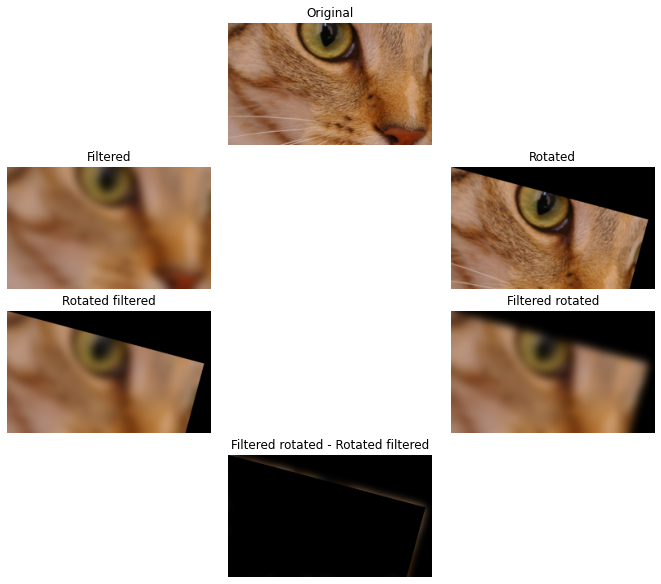

In [101]:
original = img_as_float(data.chelsea()[100:250, 50:300])

fig = plt.figure(constrained_layout = True, figsize = (12,8))
gs = fig.add_gridspec(nrows = 4, ncols = 4)
ax[0, 0] = fig.add_subplot(gs[0, 1:3])
ax[1, 0] = fig.add_subplot(gs[1, 0:2])
ax[1, 1] = fig.add_subplot(gs[1, 2:4])
ax[2, 0] = fig.add_subplot(gs[2, 0:2])
ax[2, 1] = fig.add_subplot(gs[2, 2:4])
ax[3, 0] = fig.add_subplot(gs[3, 1:3])

# Original image
ax[0, 0].imshow(original)
ax[0, 0].axis('off')
ax[0, 0].set_title('Original')

# Gaussian filtered
filtered = filters.gaussian(original, sigma=5, channel_axis=-1)
ax[1,0].imshow(filtered)
ax[1,0].axis('off')
ax[1,0].set_title('Filtered')

# Rotated filtered
tform = transform.EuclideanTransform(
    rotation = np.pi / 12.0
    )
rotated_filtered = transform.warp(filtered, tform.inverse)
ax[2,0].imshow(rotated_filtered)
ax[2,0].axis('off')
ax[2,0].set_title('Rotated filtered')


# Rotated
tform = transform.EuclideanTransform(
    rotation = np.pi / 12.0
    )
rotated = transform.warp(original, tform.inverse)
ax[1, 1].imshow(rotated)
ax[1, 1].set_title('Rotated')
ax[1, 1].axis('off')

# Filtered rotated
filtered_rotated = filters.gaussian(rotated, sigma=5, channel_axis=-1)
ax[2, 1].imshow(filtered_rotated)
ax[2, 1].axis('off')
ax[2, 1].set_title('Filtered rotated')

ax[3, 0].imshow(filtered_rotated - rotated_filtered)
ax[3, 0].axis('off')
ax[3, 0].set_title("Filtered rotated - Rotated filtered")

plt.show()